### Sources

* https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html
* https://www.census.gov/programs-surveys/geography/technical-documentation/naming-convention/cartographic-boundary-file.html

### Description

rr = resolution level

* 500k = 1:500,000
* 5m = 1:5,000,000
* 20m = 1:20,000,000

In [1]:
import numpy  as np
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from shapely import wkt
from shapely.geometry import Polygon

sns.set_style("ticks")
mpl.rcParams['figure.figsize'] = [15, 15]

Text(0.5, 1, 'cb_2019_us_county_500k')

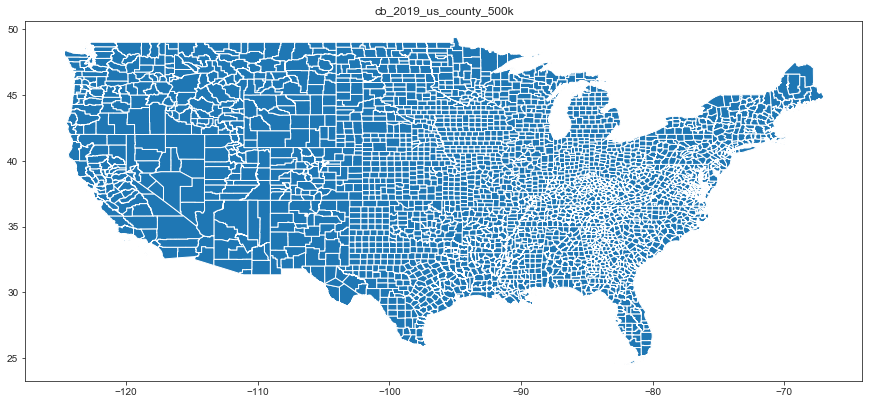

In [2]:
lat_min = 24.9493
lat_max = 49.5904
lon_min = -125.0011
lon_max = -66.9326

conus_bbox = Polygon([(lon_min, lat_min), (lon_max, lat_min), (lon_max, lat_max), (lon_min, lat_max)])

fpath = "/Users/felix/ETH/code/bdproject/data/raw/county_geodata/cb_2019_us_county_500k"
gdf_counties = gpd.read_file(fpath, bbox=conus_bbox)
ax = gdf_counties.plot()
ax.set_title("cb_2019_us_county_500k")

In [3]:
print(gdf_counties.STATEFP.unique().shape)
print(gdf_counties.COUNTYFP.unique().shape)
print(gdf_counties.COUNTYNS.unique().shape)
gdf_counties

(49,)
(301,)
(3108,)


,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,48,081,01383826,0500000US48081,48081,Coke,06,2361153195,42331832,"POLYGON ((-100.82497 31.74941, -100.82415 31.8..."
1,48,273,01383922,0500000US48273,48273,Kleberg,06,2282572445,541041659,"MULTIPOLYGON (((-97.31780 27.49456, -97.31590 ..."
2,48,203,01383887,0500000US48203,48203,Harrison,06,2331138836,40651525,"POLYGON ((-94.70215 32.45618, -94.70197 32.467..."
3,48,223,01383897,0500000US48223,48223,Hopkins,06,1987629163,65639829,"POLYGON ((-95.86333 33.04989, -95.86302 33.065..."
4,48,033,01383802,0500000US48033,48033,Borden,06,2324366073,22297606,"POLYGON ((-101.69128 32.96184, -101.55743 32.9..."
...,...,...,...,...,...,...,...,...,...,...
3103,55,027,01581073,0500000US55027,55027,Dodge,06,2268044939,81336171,"POLYGON ((-89.00953 43.32347, -89.00935 43.327..."
3104,20,119,00485024,0500000US20119,20119,Meade,06,2533222397,3258258,"POLYGON ((-100.65264 37.41669, -100.65264 37.4..."
3105,38,049,01035305,0500000US38049,38049,McHenry,06,4853487956,97323497,"POLYGON ((-101.05991 48.38598, -101.05988 48.4..."
3106,46,021,01266974,0500000US46021,46021,Campbell,06,1900214169,96243697,"POLYGON ((-100.49935 45.94363, -100.46284 45.9..."


In [4]:
gdf_counties.geometry.contains(gdf_counties.geometry.centroid)

False